### Universidad de los Andes
#### MIIA4200_1
##### Juan Camilo Angarita Villamizar

Bagging Excercise
________________________________________________________

# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df = pd.read_csv(url, index_col=0)
train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [2]:
train_df.shape

(6000, 61)

In [3]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [4]:
y.mean()

0.5

In [5]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [6]:
# Entrenar con train y validar con test

In [6]:
#from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression


#          'nb': GaussianNB(),
#          'kn': KNeighborsRegressor()
models = {'logr': LogisticRegression(),
          'dt': DecisionTreeClassifier(),
         }

In [7]:
for model in models.keys():
    models[model].fit(X_train, y_train)

In [8]:
# predict test for each model
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
    

In [9]:
y_pred.head()

,dt,logr
1483,0,1
2185,0,1
2520,1,1
3721,0,1
3727,0,0


In [11]:
from sklearn import metrics
accuracy=[]
f1_score=[]
for i in range(y_pred.shape[1]):
    accuracy.append(metrics.accuracy_score(y_pred.iloc[:,i],y_test))
    f1_score.append(metrics.f1_score(y_pred.iloc[:,i], y_test))

In [12]:
accuracy

[0.5426666666666666, 0.6273333333333333]

In [13]:
f1_score

[0.5438829787234043, 0.6104529616724739]

# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [15]:
# set a seed for reproducibility
n_estimators = 300
np.random.seed(23)

n_samples = X_train.shape[0]
n_B = 300

samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

bag = {}
for i in range(100):
    bag[i] = DecisionTreeClassifier(max_depth=None, random_state=seeds[i])
    bag[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
for i in range(100,200):
    bag[i] = DecisionTreeClassifier(max_depth=2
                                    , random_state=seeds[i])
    bag[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    
for i in range(200,300):
    bag[i] = LogisticRegression(random_state=seeds[i])
    bag[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [20]:
# Predict Arboles
y_pred_def = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_def.iloc[:, i] = trees[i].predict(X_test)

y_pred_def.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,0,1,0,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,0,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
2520,1,1,0,0,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,0,1,1,0,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [21]:
from sklearn import metrics
y_pred_def1=(y_pred_def.sum(axis=1) >= (n_estimators / 2)).astype(np.int)
y_pred_def1.head()

metrics.f1_score(y_pred_def1, y_test)

0.6246537396121883

In [22]:
metrics.accuracy_score(y_pred_def1, y_test)

0.6386666666666667

# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [24]:
threshold=[]
f1score=[]
for i in np.arange(0.1, 1, 0.05):
    y_pred_def1 = (y_pred_def.sum(axis=1) >= (n_estimators *i)).astype(np.int)
    threshold.append((i,metrics.f1_score(y_pred_def1, y_test)))
    f1score.append(metrics.f1_score(y_pred_def1, y_test))

In [25]:
threshold

[(0.1, 0.6980769230769232),
 (0.15000000000000002, 0.6981740064446831),
 (0.20000000000000004, 0.6795547744581136),
 (0.25000000000000006, 0.6743341404358353),
 (0.30000000000000004, 0.6703635243376463),
 (0.3500000000000001, 0.6629001883239171),
 (0.40000000000000013, 0.6563307493540051),
 (0.45000000000000007, 0.6420911528150134),
 (0.5000000000000001, 0.6217904233171409),
 (0.5500000000000002, 0.5973837209302325),
 (0.6000000000000002, 0.5854383358098069),
 (0.6500000000000001, 0.5800604229607251),
 (0.7000000000000002, 0.5665896843725943),
 (0.7500000000000002, 0.550197628458498),
 (0.8000000000000002, 0.5205254515599343),
 (0.8500000000000002, 0.46028880866426),
 (0.9000000000000002, 0.2644808743169399),
 (0.9500000000000003, 0.046272493573264774)]

In [26]:
pd.Series(f1score).describe()

count    18.000000
mean      0.565270
std       0.166797
min       0.046272
25%       0.554296
50%       0.609587
75%       0.668498
max       0.698174
dtype: float64

Text(0,0.5,'F1Score')

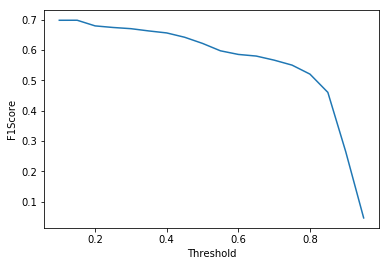

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(0.1, 1, 0.05), f1score)
plt.xlabel('Threshold')
plt.ylabel('F1Score')

# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [28]:
samples_oob = []
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [29]:
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_1 = bag[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_1)

Text(0.5,1,'OOB error of each tree')

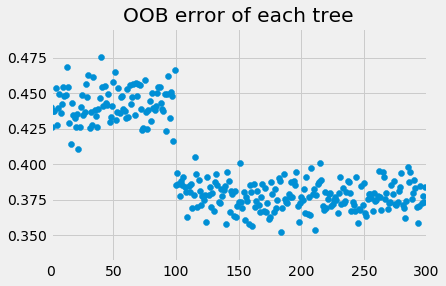

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [31]:
alpha = (1 - errors) / (1 - errors).sum()

In [33]:
weighted_sum = ((y_pred_def) * alpha).sum(axis=1)

In [34]:
y_pred = (weighted_sum >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6198749131341209, 0.6353333333333333)

# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [35]:
threshold=[]
f1score_v=[]
for i in np.arange(0.1, 1, 0.05):
    y_pred = (weighted_sum >= i).astype(np.int)
    threshold.append((i,metrics.f1_score(y_pred, y_test)))
    f1score_v.append(metrics.f1_score(y_pred, y_test))

In [36]:
threshold

[(0.1, 0.7049659201557935),
 (0.15000000000000002, 0.6969365426695842),
 (0.20000000000000004, 0.6761229314420804),
 (0.25000000000000006, 0.6723404255319149),
 (0.30000000000000004, 0.6687230104873535),
 (0.3500000000000001, 0.6629001883239171),
 (0.40000000000000013, 0.6563307493540051),
 (0.45000000000000007, 0.6407506702412868),
 (0.5000000000000001, 0.6198749131341209),
 (0.5500000000000002, 0.596949891067538),
 (0.6000000000000002, 0.5875370919881305),
 (0.6500000000000001, 0.5817633760361719),
 (0.7000000000000002, 0.5668202764976958),
 (0.7500000000000002, 0.5531914893617021),
 (0.8000000000000002, 0.5285481239804242),
 (0.8500000000000002, 0.4881889763779528),
 (0.9000000000000002, 0.31315240083507306),
 (0.9500000000000003, 0.06345177664974619)]

In [37]:
pd.Series(f1score_v).describe()

count    18.000000
mean      0.571030
std       0.157519
min       0.063452
25%       0.556599
50%       0.608412
75%       0.667267
max       0.704966
dtype: float64

Text(0,0.5,'F1Score')

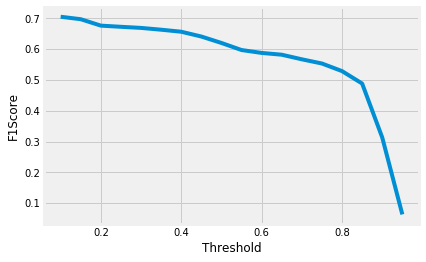

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(0.1, 1, 0.05), f1score_v)
plt.xlabel('Threshold')
plt.ylabel('F1Score')

# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [39]:
X_train1 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    X_train1[i] = bag[i].predict(X_train)

In [41]:
X_train1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2420,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,1,0,0,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
324,0,0,0,0,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5863,1,1,1,1,1,1,1,1,0,1,...,0,1,0,1,1,1,1,1,1,1
86,0,1,1,1,0,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1


In [42]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train1, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [45]:
pred_y = lr.predict(y_pred_def)

In [46]:
metrics.f1_score(pred_y, y_test), metrics.accuracy_score(pred_y, y_test)

(0.6465968586387435, 0.64)